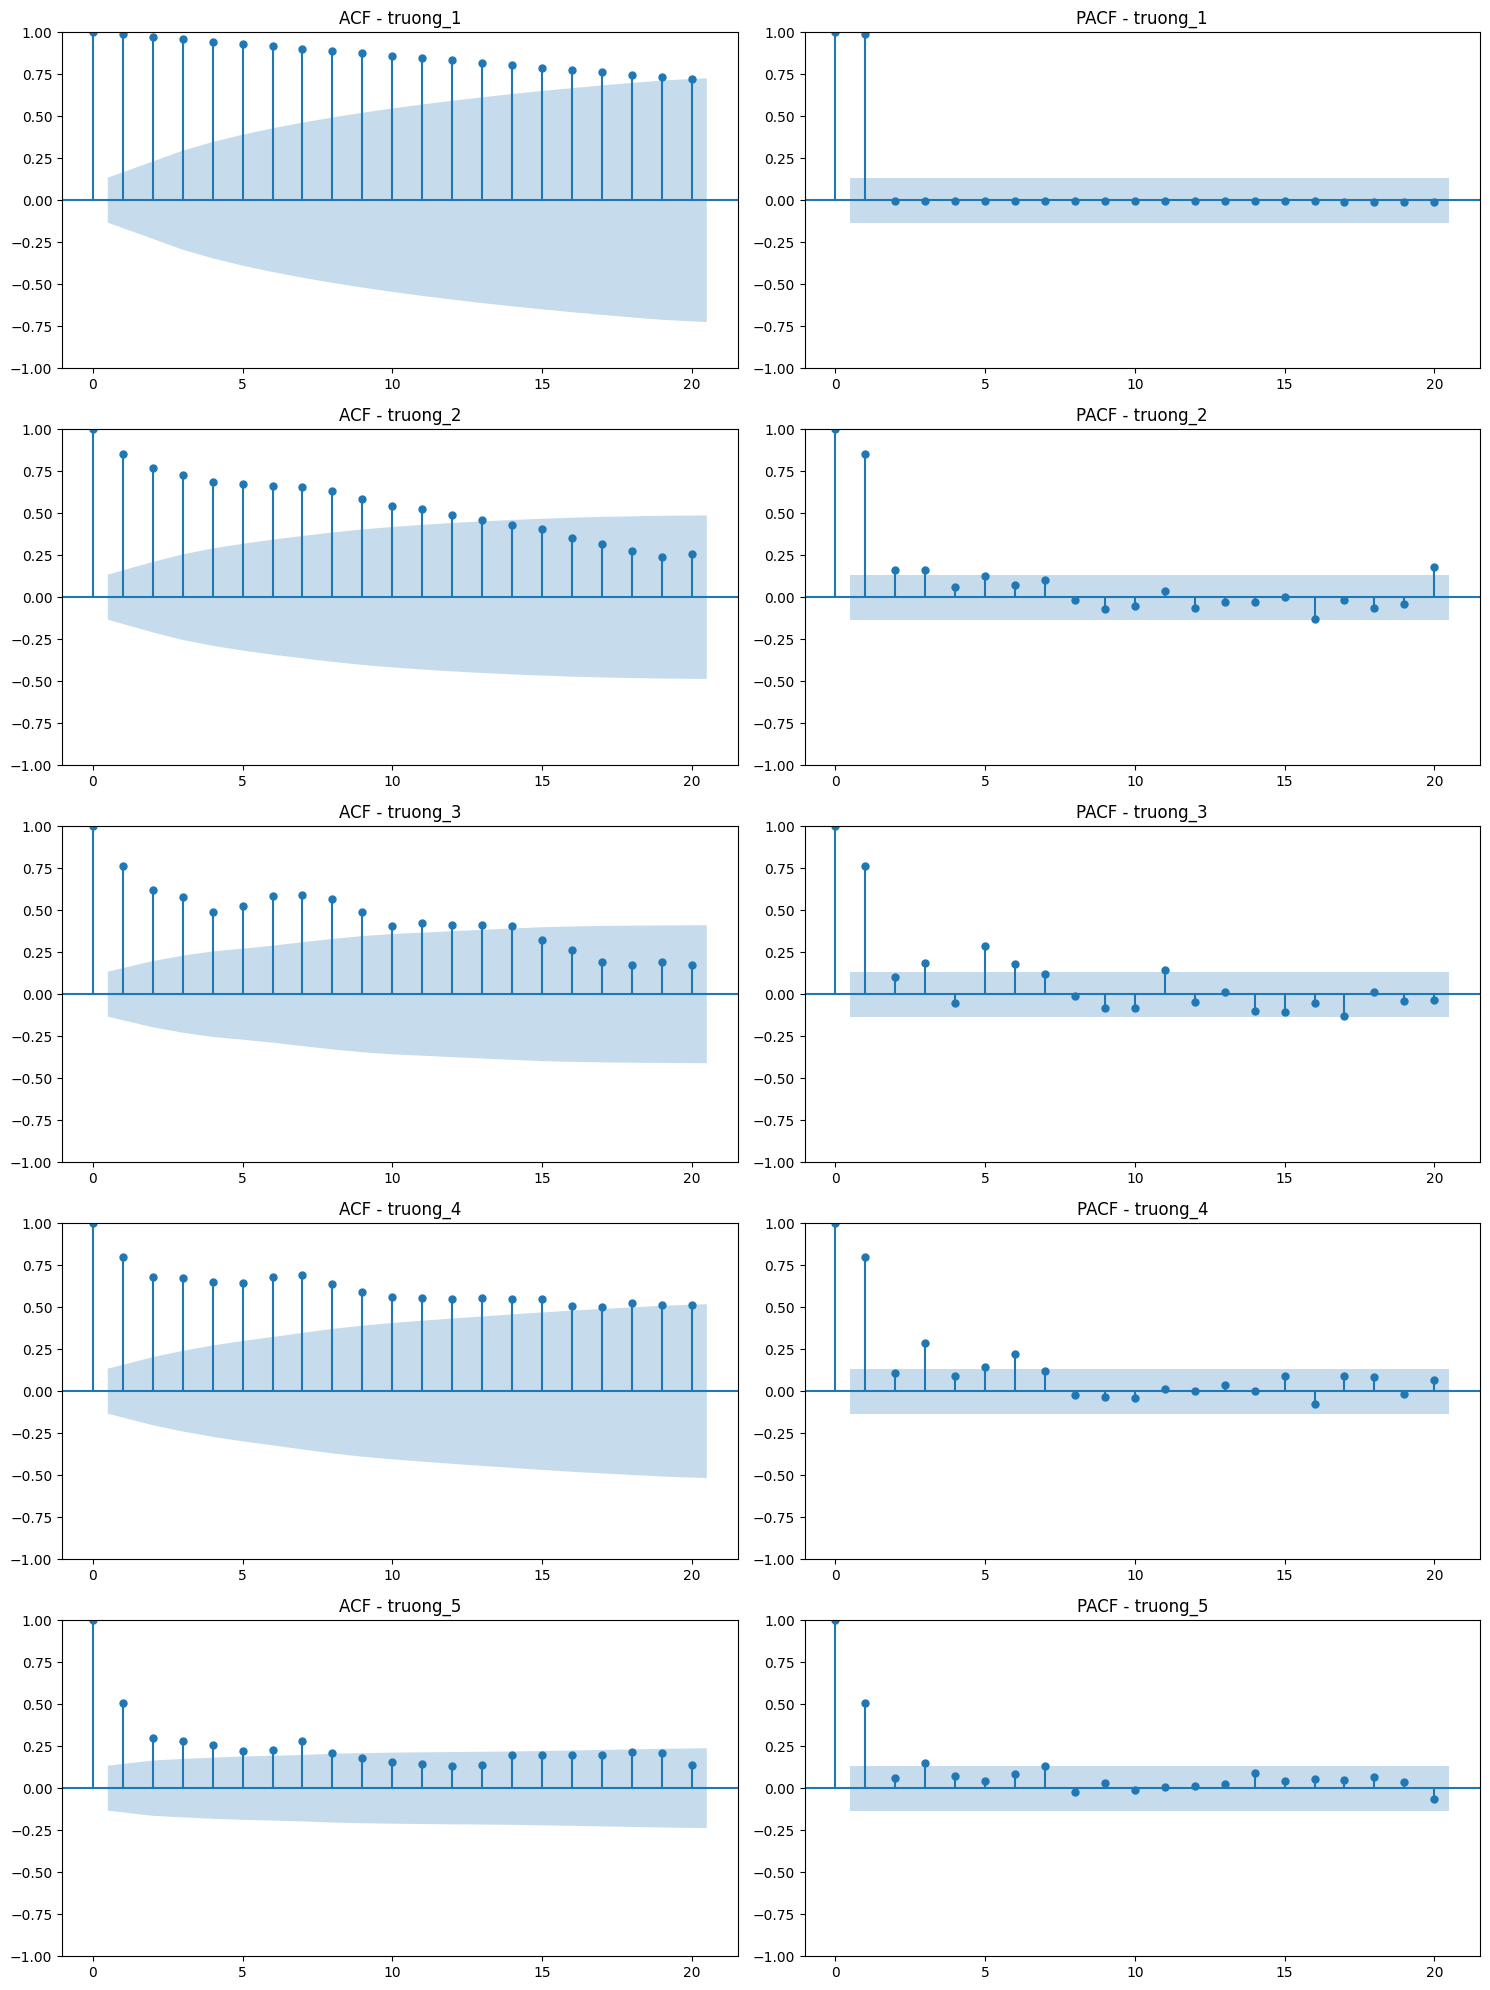

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = pd.read_csv('./pred_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Plot ACF and PACF for all columns
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

for i, column in enumerate(data.columns[1:]):
    plot_acf(data[column], lags=20, ax=axs[i, 0])
    plot_pacf(data[column], lags=20, ax=axs[i, 1])
    axs[i, 0].set_title(f'ACF - {column}')
    axs[i, 1].set_title(f'PACF - {column}')

plt.tight_layout()
plt.show()


In [2]:
# Su dung 30 ngay cuoi de test
train_1 = data['truong_1'][:-30] 
test_1 = data['truong_2'][-30:]

train_2 = data['truong_2'][:-30] 
test_2 = data['truong_2'][-30:]

train_3 = data['truong_3'][:-30] 
test_3 = data['truong_3'][-30:]

train_4 = data['truong_4'][:-30] 
test_4 = data['truong_4'][-30:]

train_5 = data['truong_5'][:-30] 
test_5 = data['truong_5'][-30:]

In [3]:
from pmdarima import auto_arima

for column in data.columns[1:]:
    model = auto_arima(data[column], seasonal=True, m=7, stepwise=True, suppress_warnings=True)
    print(f"Best SARIMA model for {column}: {model.order}x{model.seasonal_order}")


Best SARIMA model for truong_1: (0, 1, 0)x(0, 0, 0, 7)
Best SARIMA model for truong_2: (0, 1, 2)x(0, 0, 0, 7)
Best SARIMA model for truong_3: (1, 1, 2)x(0, 0, 2, 7)
Best SARIMA model for truong_4: (0, 1, 2)x(0, 0, 1, 7)
Best SARIMA model for truong_5: (0, 1, 2)x(1, 0, 1, 7)


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# List to store SARIMA models for each column
models = []

# Assume 'data' is your DataFrame with columns 'date', 'truong_1', 'truong_2', ..., 'truong_5'

for column in data.columns[1:]:
    train_data = data[column][:-30]  # Use all but the last 30 days for training

    # Define SARIMA model
    if column == 'truong_1':
        model = SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(0, 0, 0, 7))
    elif column == 'truong_2':
        model = SARIMAX(train_data, order=(0, 1, 2), seasonal_order=(0, 0, 0, 7))
    elif column == 'truong_3':
        model = SARIMAX(train_data, order=(1, 1, 2), seasonal_order=(0, 0, 2, 7))
    elif column == 'truong_4':
        model = SARIMAX(train_data, order=(0, 1, 2), seasonal_order=(0, 0, 1, 7))
    elif column == 'truong_5':
        model = SARIMAX(train_data, order=(0, 1, 2), seasonal_order=(1, 0, 1, 7))
    else:
        model = None
    
    # Fit model and append to list
    if model is not None:
        model_fit = model.fit()
        models.append(model_fit)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.79007D-01    |proj g|=  3.25977D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     15      1     0     0   2.191D-04  -3.790D-01
  F = -0.37901446953418744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19101D+00    |proj g|=  3.97180D-02

At iterate    5    f=  5.18960D+00    |proj g|=  6.39449D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     10      1     0     0   1.244D-05   5.190D+00
  F =   5.1895964648380213     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

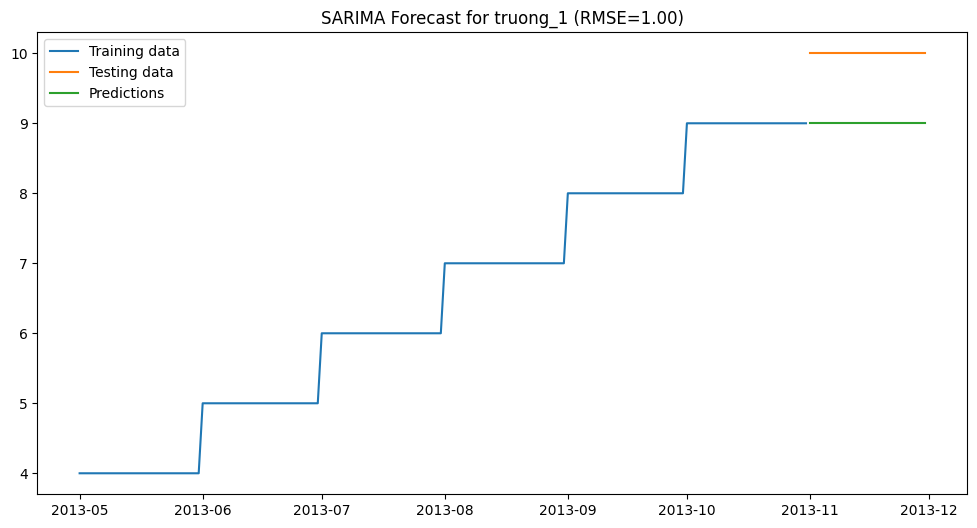

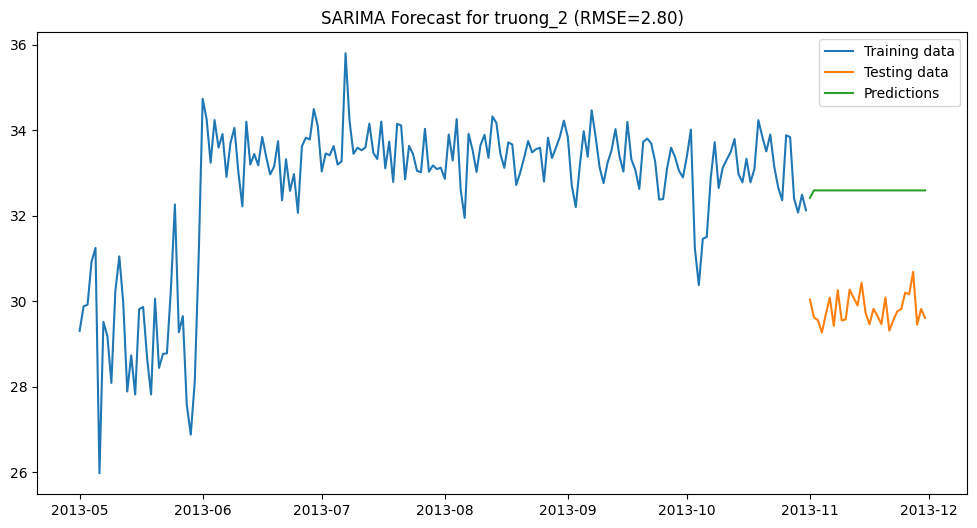

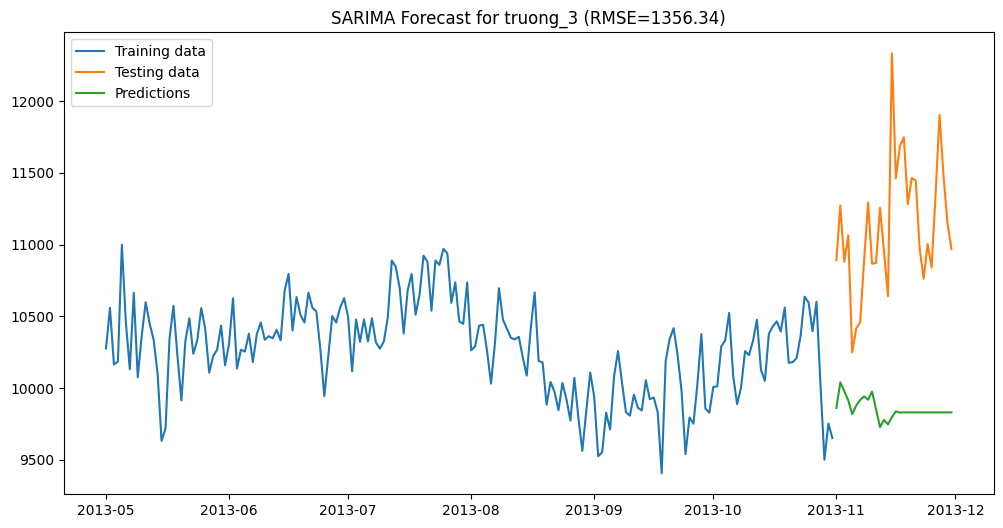

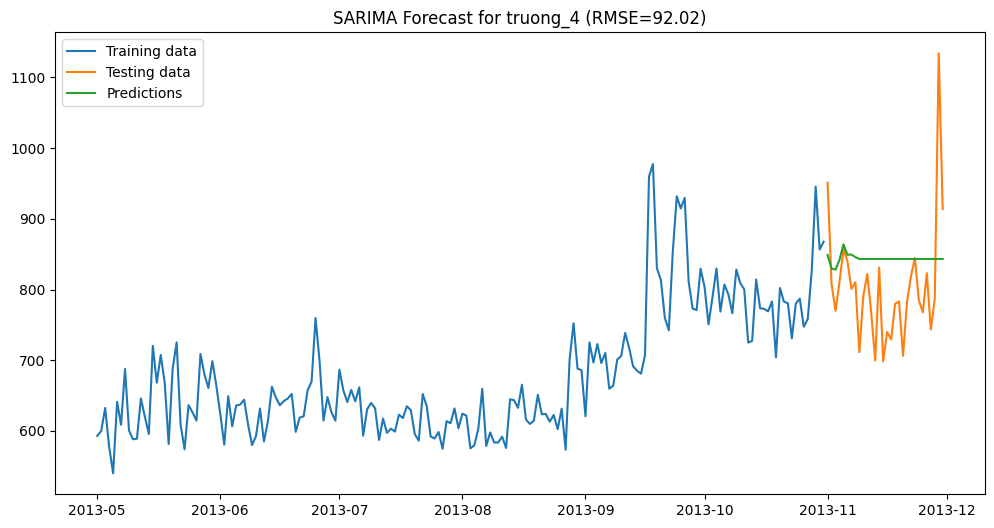

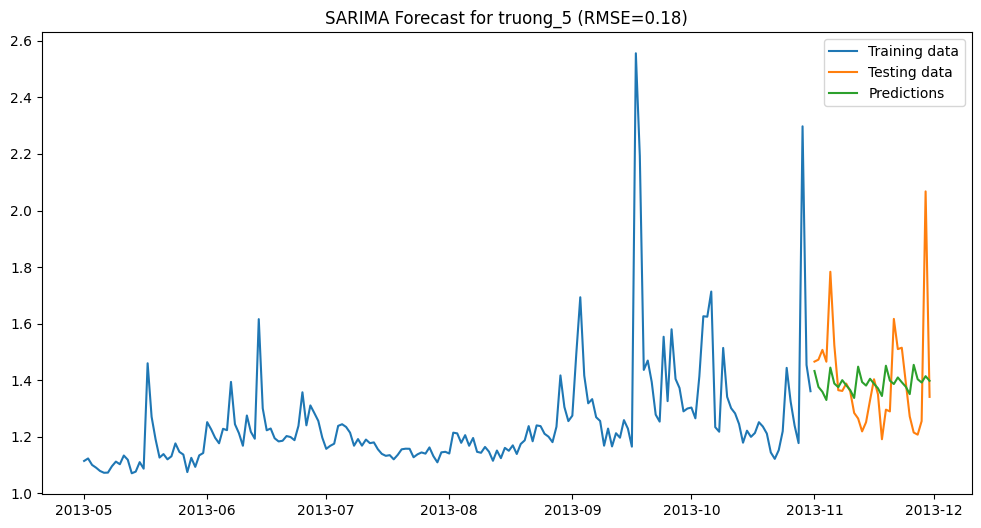

RMSE for truong_1: 1.00
RMSE for truong_2: 2.80
RMSE for truong_3: 1356.34
RMSE for truong_4: 92.02
RMSE for truong_5: 0.18


In [13]:

rmse_list = []

for i, model_fit in enumerate(models, 1):
    train_data = data[f'truong_{i}'][:-30]
    test_data = data[f'truong_{i}'][-30:]

    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    predictions = model_fit.predict(start=start, end=end, dynamic=False)

    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    rmse_list.append(rmse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Training data')
    plt.plot(test_data.index, test_data, label='Testing data')
    plt.plot(test_data.index, predictions, label='Predictions')
    plt.title(f'SARIMA Forecast for truong_{i} (RMSE={rmse:.2f})')
    plt.legend()
    plt.show()
for i, rmse in enumerate(rmse_list, 1):
    print(f'RMSE for truong_{i}: {rmse:.2f}')


In [14]:
from statsmodels.tsa.arima.model import ARIMA

arimax_models = []

for column in data.columns[1:]:
    train_data = data[column][:-30]
    if column == 'truong_1':
        model = ARIMA(train_data, exog=data[['truong_2', 'truong_3', 'truong_4', 'truong_5']][:-30],
                        order=(0, 1, 0))
    elif column == 'truong_2':
        model = ARIMA(train_data, exog=data[['truong_1', 'truong_3', 'truong_4', 'truong_5']][:-30],
                        order=(0, 1, 2))
    elif column == 'truong_3':
        model = ARIMA(train_data, exog=data[['truong_1', 'truong_2', 'truong_4', 'truong_5']][:-30],
                        order=(1, 1, 2))
    elif column == 'truong_4':
        model = ARIMA(train_data, exog=data[['truong_1', 'truong_2', 'truong_3', 'truong_5']][:-30],
                        order=(0, 1, 2))
    elif column == 'truong_5':
        model = ARIMA(train_data, exog=data[['truong_1', 'truong_2', 'truong_3', 'truong_4']][:-30],
                        order=(0, 1, 2))
    else:
        model = None
    
    if model is not None:
        model_fit = model.fit()
        arimax_models.append(model_fit)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

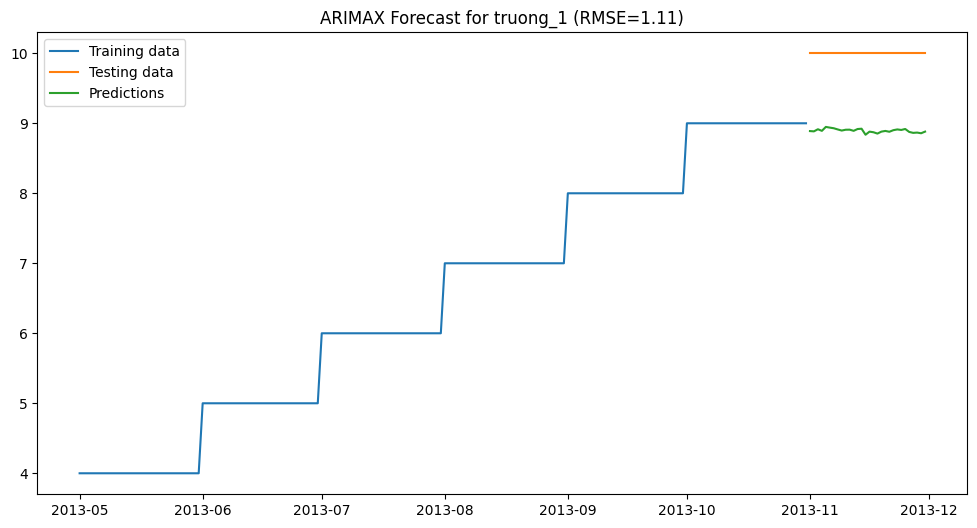

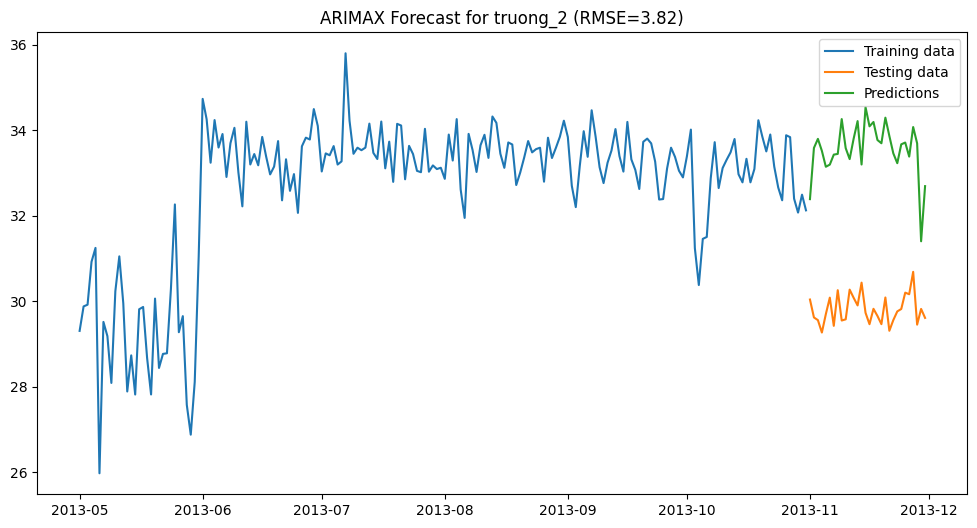

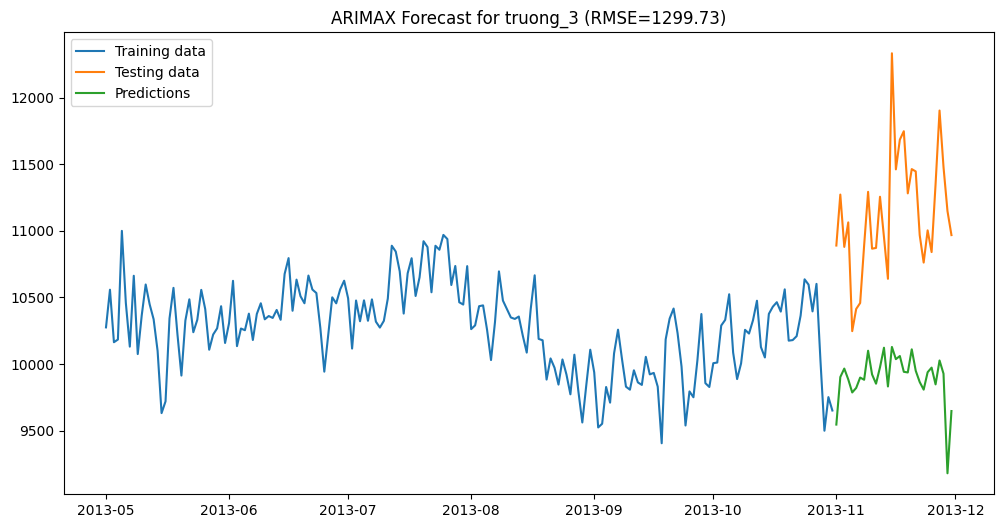

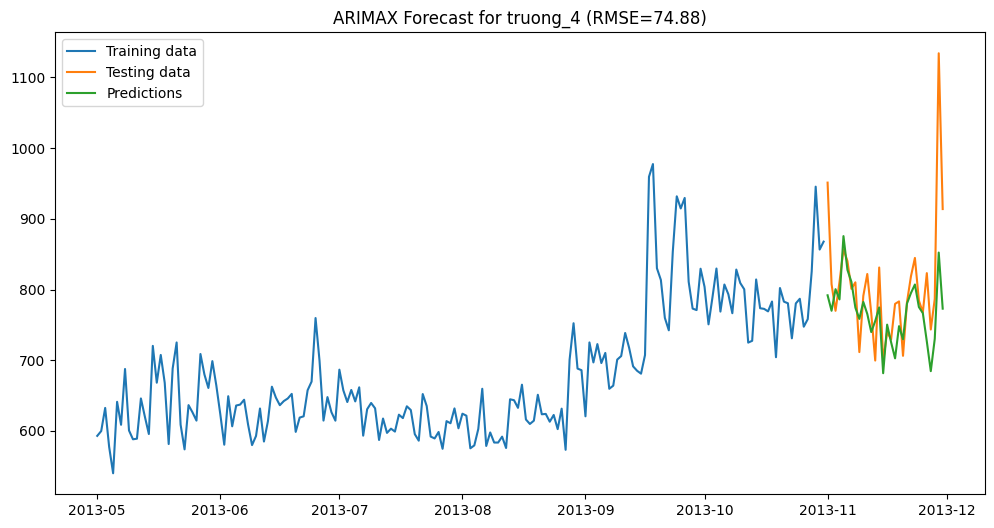

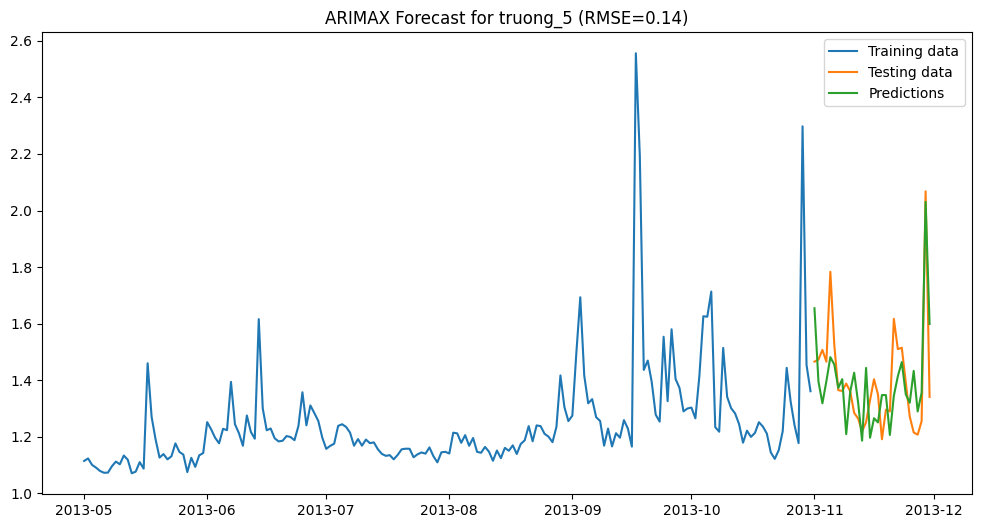

RMSE for truong_1: 1.11
RMSE for truong_2: 3.82
RMSE for truong_3: 1299.73
RMSE for truong_4: 74.88
RMSE for truong_5: 0.14


In [17]:
rmse_list = []


for i, model_fit in enumerate(arimax_models, 1):
    column = data.columns[i]

    train_data = data[column][:-30]
    test_data = data[column][-30:]

    exog_train = data[[f'truong_{j}' for j in range(1, 6) if j != i]][:-30]
    exog_test = data[[f'truong_{j}' for j in range(1, 6) if j != i]][-30:]

    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    predictions = model_fit.predict(start=start, end=end, exog=exog_test, dynamic=False)

    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    rmse_list.append(rmse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Training data')
    plt.plot(test_data.index, test_data, label='Testing data')
    plt.plot(test_data.index, predictions, label='Predictions')
    plt.title(f'ARIMAX Forecast for truong_{i} (RMSE={rmse:.2f})')
    plt.legend()
    plt.show()

for i, rmse in enumerate(rmse_list, 1):
    print(f'RMSE for truong_{i}: {rmse:.2f}')
